<a href="https://colab.research.google.com/github/fernanda0402/Python/blob/master/Projeto_1_FernandaA_Flavia_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1 de Introdução à Python.**

Alunos: Fernanda Araujo, Flávia Fialho e Victor Assis.

In [45]:
import matplotlib.pyplot as plt
import numpy as np

Temos que $\beta$ e $\gamma$ são definidos como:

$\beta = \frac{v}{c}$ e $\gamma = \frac{1}{(1 - (v/c)^2)^{1/2}} = \frac{1}{(1 - \beta^2)^{1/2}}$

In [72]:
#Constantes

mcquad = 0.511
#I1 = 0.75*(10**-6)          #Observação 0
I = 322*(10**-6)
ZsobreA = 0.45636 #
K = 0.307 #
e = 1.6*10**(-19)
densidade = 8.96

In [73]:
def gamma(beta):
  global y # sem isso não há print()
  y = 1/((1-(float(beta))**2)**(1/2))
  return y

#Teste para beta = 0.6
print(gamma(0.6))

1.25


In [74]:
#beta vai de 0 a 0.995, fazer grafico gamma x beta
beta = 0
betalimit = 0.995
betalist = []
gammalist = []
gammabetalist = []
gammabetaquadradolist = []
colcheteslist = []
menosdEsobredxlist = []

while beta <= betalimit:
  betalist.append(beta)
  gamma(beta)
  gammalist.append(gamma(beta))
  gammabetalist.append(beta*(gamma(beta)))
  gammabetaquadradolist.append((2*mcquad*(beta*(gamma(beta)))**2))
  beta = beta + 0.005
  colcheteslist.append(round((np.log(((2*mcquad*(beta*(gamma(beta)))**2))/I))- (beta)**2, 2))         #Observação 1
  menosdEsobredxlist.append((K*ZsobreA*densidade*(e/beta)**2)*(round((np.log((2*mcquad*(beta*(gamma(beta)))**2)/I))- (beta)**2, 2)))  #Observação 2

print(gammalist)
print(betalist)
print(gammabetalist)
print(gammabetaquadradolist)



#Outra forma de fazer as listas
Gamma2 = []
Beta2 = []
for i in gammabetaquadradolist:
  Gamma2.append(i + 1)

for i in Gamma2:
  Beta2.append(1 - 1/i)
#print(Gamma2)
#print(Beta2)

[1.0, 1.00001250023438, 1.0000500037503126, 1.0001125189879354, 1.000200060020007, 1.0003126465607106, 1.0004503039779922, 1.0006130633094494, 1.0008009612817945, 1.001014040333908, 1.0012523486435176, 1.0015159401575338, 1.0018048746260764, 1.0021192176402405, 1.002459040673642, 1.0028244211278003, 1.00321544238141, 1.0036321938435673, 1.0040747710110163, 1.0045432755294885, 1.005037815259212, 1.0055585043446753, 1.0061054632887345, 1.0066788190311604, 1.0072787050317253, 1.0079052613579391, 1.0085586347775501, 1.009238978855929, 1.009946454058471, 1.0106812278581463, 1.0114434748483472, 1.012233376861183, 1.0130511230913848, 1.0138969102259876, 1.0147709425799718, 1.0156734322380512, 1.0166045992028059, 1.0175646715493711, 1.0185538855869014, 1.019572486027043, 1.0206207261596576, 1.0216988680360581, 1.0228071826600218, 1.02394595018687, 1.025115460130912, 1.0263160115815708, 1.0275479134285173, 1.0288114845961682, 1.0301070542879114, 1.0314349622404462, 1.0327955589886444, 1.0341892

Text(0.5, 0, '$\\beta$')

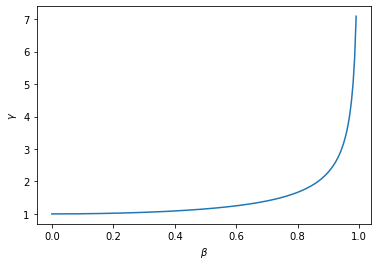

In [75]:
#gráfico gamma x beta

dadosdegamma = gammalist
dadosdebeta = betalist
plt.plot(dadosdebeta,dadosdegamma)
plt.ylabel(r"$\gamma$")
plt.xlabel(r"$\beta$")

Text(0.5, 0, '$\\beta$')

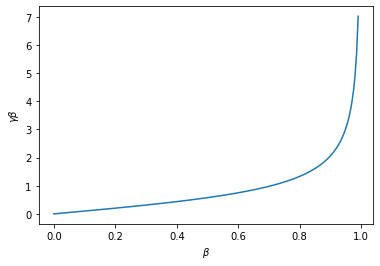

In [76]:
#gráfico gamma*beta x beta

dadosdegammabeta = gammabetalist
dadosdebeta = betalist
plt.plot(dadosdebeta,dadosdegammabeta)
plt.ylabel(r"$\gamma\beta$")
plt.xlabel(r"$\beta$")

Observamos que $\beta$ e $\gamma \beta$ são diretamente proporcionais, pois o segundo cresce junto do primeiro. O gráfico parece o de uma exponencial, com o crescimento começando lentamente e acentuando perto do valor de 0,8. Ou seja, em baixas velocidades ($\beta = 0,1$), o produto $\gamma \beta$ também possui baixos valores e, quanto mais próximo de 1 (ou seja, quanto mais próxima a partícula está da velocidade da luz $c$), mais rápido o produto $\gamma \beta$ cresce.

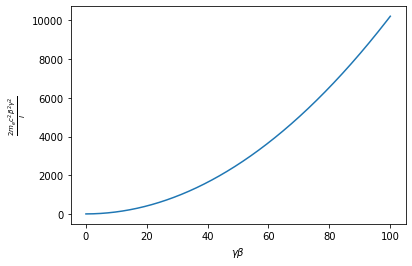

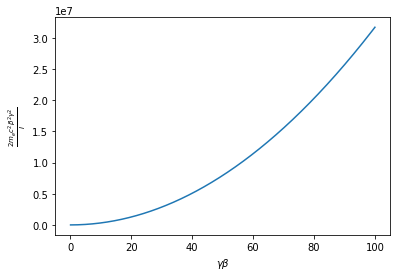

In [77]:
#5
#Gráfico deve ser: ln_argument vs gamma*beta
#Intervalo 0.1 até 100

N_intervals = 1000
GammaBeta = np.linspace(0.1,100, N_intervals)
ln_argument_list = []

for element in GammaBeta:
    value = 2*mcquad*(element)**2            #Considerando I igual a 1
    ln_argument_list.append(value)

#Trace o argumento do log natural na equação de Bethe-Block em uma função de Gamma*Beta.
plt.plot(GammaBeta,ln_argument_list)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#Definindo ln_argument
#Qual deve ser o argumento da função? Gamma, Beta ou Gamma*Beta
def ln_argument(gamma_beta):
    """
    Dado um valor de gamma_beta, produz um argumento do log natural da eq. de Bethe-Block
    """
    return 2*mcquad*(gamma_beta)**2/I

lnArgumentList = [ln_argument(gamma_beta) for gamma_beta in GammaBeta]

plt.plot(GammaBeta,lnArgumentList)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#print(ln_argument_list)
#print(lnArgumentList)

A função ln_argument() deve aceitar o produto $\gamma \beta$, pois é ele que está presente no argumento do logaritmo da função de Beth-Bloch.

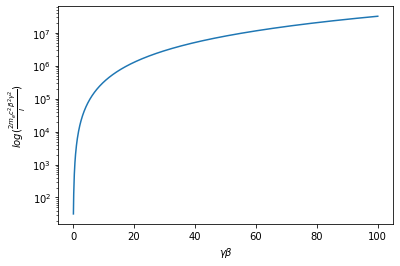

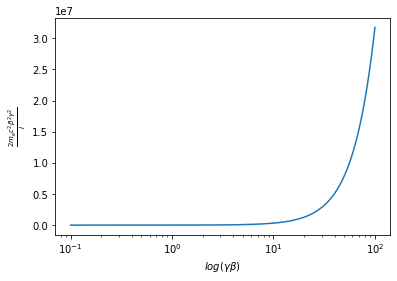

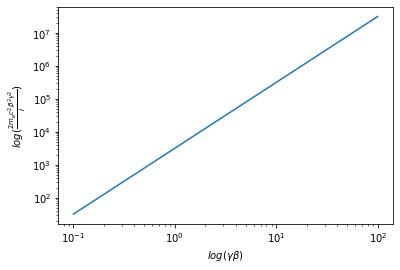

In [78]:
#6
#semilog no eixo y
plt.semilogy(GammaBeta,lnArgumentList)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

#semilog no eixo x
plt.semilogx(GammaBeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta)$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#log dos dois
plt.loglog(GammaBeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

Aplicando-se a função logarítmica em ambos os eixos temos melhora na resolução do gráfico, pois assim obtemos uma reta, que nos proporciona uma melhor análise.

In [79]:
#7 
#Provavel que agora, seus valores não estão uniformemente espaçados no gráfico. Faça um vetor de valores
#que tenham um logaritmo uniformemente espaçado de 0,1 a 100.
#Repita o grafico mais uma vez usando os novos argumentos. Uma identidade util aqui é gamma**2 = (gamma*beta)**2 +1
#têm que encontrar valores de \Gamma\Beta tais que ln(\Gamma\Beta) seja igual a 0.1, 0.2, 0.3....100. E guardar esses valores em uma lista, por exemplo.

n_intervals = 1000
loggammabeta = np.linspace(0.1,100, n_intervals)


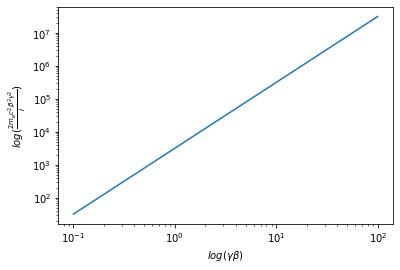

In [80]:
plt.loglog(loggammabeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

In [86]:
#Vamos definir de beta em função de gamma*beta

def beta(gamma_beta):
    return gamma_beta / (np.sqrt(np.power(gamma_beta, 2) + 1))

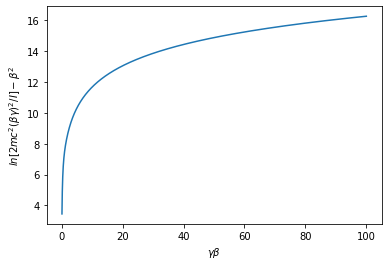

In [87]:
def colchetes(gamma_beta):
    return np.log(ln_argument(gamma_beta)) - np.power(beta(gamma_beta), 2)

gammabeta_logspace = np.logspace(np.log(0.1), np.log(100), 1000, base=np.e)
colchetes1 = colchetes(gammabeta_logspace)

plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$ln[2mc^2(\beta\gamma)^2/I] - \beta^2$")
plt.plot(gammabeta_logspace, colchetes1)
plt.show()

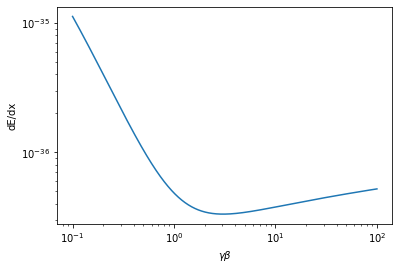

In [84]:
#9
#Finalmente, plote toda a equação −(dE/dx), a energia perdida por unidade de distância,
#para múons que passam pelo cobre. Os dados de que vc precisa sobre o cobre estão
#todos no PDG. Além disso, pode encontrar mais sobre o múon aqui. Convertendo para
#nossas unidades, a perda de energia deve ter uma largura mínima de 13 MeV / cm para
#o momento do múon ou energia em torno de 300 MeV.

def bethebloch(gamma_beta):
    return K * np.power(e, 2) * ZsobreA * densidade * 1/np.power(beta(gamma_beta), 2) * colchetes(gamma_beta)

bethebloch_logspace = bethebloch(gammabeta_logspace)

plt.loglog(gammabeta_logspace,bethebloch_logspace)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel("dE/dx")
plt.show()

O resultado encontrado pelo grupo é satisfatório, já que, no intervalo do gráfico acima (0,1 a 100), percebemos que este está semelhante ao apresentado no PDF do projeto.

In [88]:
#Integrando a equação de Bethe-Bloch

#Esta eq. não depende explicitamente de x, então, ao integrarmos, multiplicaremos a eq. por:

round((184.9 - 1.069)/8.96,3)

20.517

In [89]:
def bethebloch2(gamma_beta):
    z = []
    for i in gamma_beta:
        z.append((K * np.power(e, 2) * ZsobreA * densidade * 1/np.power(beta(i), 2) * colchetes(i))*20.517)
    return z

bethebloch2(gammabetalist)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


[-inf,
 -6.682818741529131e-32,
 -7.566688170214402e-33,
 -9.866315472409281e-34,
 3.934177442817611e-34,
 7.225935976756158e-34,
 7.689377973786727e-34,
 7.308725672066049e-34,
 6.696273469218248e-34,
 6.0578854796130485e-34,
 5.462635195427631e-34,
 4.930059206835502e-34,
 4.461344162521073e-34,
 4.051209078067812e-34,
 3.6925759311907387e-34,
 3.3783891745617186e-34,
 3.1022692759616577e-34,
 2.85868545540363e-34,
 2.642935886785957e-34,
 2.451058647259346e-34,
 2.2797257885727454e-34,
 2.126141803997025e-34,
 1.9879540597415767e-34,
 1.8631768270308551e-34,
 1.7501281281448395e-34,
 1.6473777656943178e-34,
 1.5537047517674906e-34,
 1.4680624830018274e-34,
 1.3895502323221774e-34,
 1.3173897657315428e-34,
 1.2509061097787043e-34,
 1.1895116813437817e-34,
 1.1326931453262303e-34,
 1.0800004908309265e-34,
 1.031037916894456e-34,
 9.85456199048904e-35,
 9.429462719813935e-35,
 9.032338144970248e-35,
 8.660746636119531e-35,
 8.312509170436994e-35,
 7.985676093356956e-35,
 7.678498677012

# **Observações:**

Observação 0: Esse valor de I foi encontrado empiricamente para que os valores do colchete começassem em 3,55 e fossem além de 16, como pedido no item 8. Porém, o valor não correspondia ao valor da energia média de excitação do cobre. 

Observação 1: Tentamos plotar o gráfico com as listas feitas pelo loop, porém percebemos que a escala do eixo x se limitava de 0 a 7. 

Observação 2: Da mesma forma, o eixo x do gráfico também estava limitado entre 0 e 7. Além disso, o gráfico não correspondia ao representado no PDF do projeto.

Abaixo, encontram-se as tentativas com as observações acima.

In [56]:
#8
#Plote o conteúdo dos colchetes versus \Gamma\Beta usando o mesmo espaçamento do vetor de log para o argumento x.

print('O conteúdo dos colchetes é: ',colcheteslist)

O conteúdo dos colchetes é:  [3.53, 4.91, 5.73, 6.3, 6.75, 7.11, 7.42, 7.69, 7.92, 8.13, 8.32, 8.5, 8.66, 8.81, 8.94, 9.07, 9.19, 9.31, 9.42, 9.52, 9.62, 9.71, 9.8, 9.88, 9.97, 10.04, 10.12, 10.19, 10.26, 10.33, 10.4, 10.46, 10.52, 10.58, 10.64, 10.7, 10.75, 10.8, 10.86, 10.91, 10.96, 11.0, 11.05, 11.1, 11.14, 11.19, 11.23, 11.27, 11.31, 11.35, 11.39, 11.43, 11.47, 11.51, 11.55, 11.58, 11.62, 11.65, 11.69, 11.72, 11.75, 11.79, 11.82, 11.85, 11.88, 11.91, 11.94, 11.97, 12.0, 12.03, 12.06, 12.09, 12.12, 12.15, 12.17, 12.2, 12.23, 12.25, 12.28, 12.31, 12.33, 12.36, 12.38, 12.41, 12.43, 12.46, 12.48, 12.5, 12.53, 12.55, 12.57, 12.6, 12.62, 12.64, 12.67, 12.69, 12.71, 12.73, 12.75, 12.78, 12.8, 12.82, 12.84, 12.86, 12.88, 12.9, 12.92, 12.95, 12.97, 12.99, 13.01, 13.03, 13.05, 13.07, 13.09, 13.11, 13.13, 13.15, 13.17, 13.19, 13.21, 13.23, 13.25, 13.27, 13.29, 13.31, 13.33, 13.35, 13.37, 13.39, 13.41, 13.43, 13.45, 13.47, 13.49, 13.51, 13.53, 13.55, 13.57, 13.59, 13.62, 13.64, 13.66, 13.68, 1

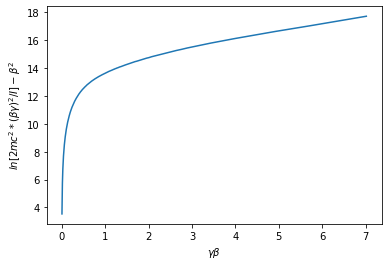

In [57]:
#Plotando o conteúdo dos colchetes x gamma*beta

plt.plot(gammabetalist,colcheteslist)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$ln[2mc^2*(\beta\gamma)^2/I] - \beta^2$") 
plt.show()

#x = 2*m*c^2*(beta*gamma)^2

[4.537625174605824e-33, 1.577885241311232e-33, 8.184007633141764e-34, 5.0614445113344e-34, 3.470704807772161e-34, 2.5387562945740803e-34, 1.94653285515264e-34, 1.5445439798476802e-34, 1.2568807534318937e-34, 1.0450677810069509e-34, 8.83877073788319e-35, 7.587703412053336e-35, 6.58696112980647e-35, 5.777949613845946e-35, 5.107506334400512e-35, 4.5542958053376006e-35, 4.0876300376042744e-35, 3.6936741838544594e-35, 3.3542668810109515e-35, 3.0593620157399025e-35, 2.804079974029408e-35, 2.5788600920927196e-35, 2.381355955763296e-35, 2.204897344443732e-35, 2.050543818280796e-35, 1.9091538609485246e-35, 1.7844603289465143e-35, 1.670752172675656e-35, 1.568213825152699e-35, 1.4754066116990285e-35, 1.3911176629602823e-35, 1.3130632338431993e-35, 1.241771743623545e-35, 1.1764724101701084e-35, 1.1165018640875515e-35, 1.0612866210322956e-35, 1.009389840747523e-35, 9.614140741751128e-36, 9.178136755157579e-36, 8.765136447406071e-36, 8.381017624690516e-36, 8.015821131580946e-36, 7.682088040759235e-3

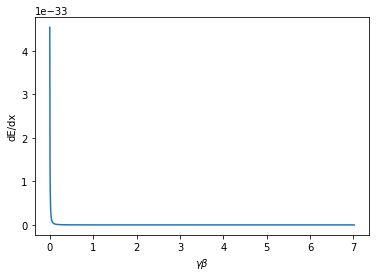

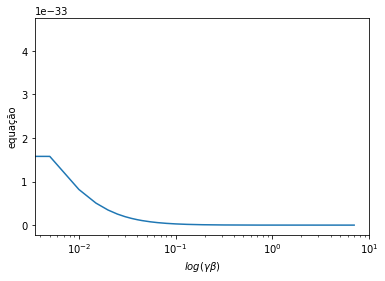

In [58]:
#9

print(menosdEsobredxlist)

plt.plot(gammabetalist,menosdEsobredxlist)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel("dE/dx")
plt.show()

plt.semilogx(gammabetalist,menosdEsobredxlist)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel("equação")
plt.show()


#print(gammabetalist)
#print(menosdEsobredxlist)

# Referências: 

Dados do múon e cobre: https://pdg.lbl.gov/2020/AtomicNuclearProperties/MUE/muE_copper_Cu.pdf